In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as preprocessing
from IPython.core.interactiveshell import InteractiveShell
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectFromModel

InteractiveShell.ast_node_interactivity = 'all'

to_show = True
to_save = False
is_sample = False
is_sample = True
limit_rows = 1000

In [2]:
# This data cleaning part gets ideas from https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python
# HAN YIKAI takes charge of feature 1-9
# official file
train_file = '../input/train_ver2.csv'
test_file = '../input/test_ver2.csv'

out_path = '../output/'


def save_df2file(data_frame: pd.DataFrame, name: str):
    data_frame.to_csv(f'{out_path}{name}.csv')

# sns.set(rc = {'figure.figsize':(20,18)})


In [3]:
df = pd.read_csv(train_file,
                 dtype={'sexo': str,
                        'ind_nuevo': str,
                        'ult_fec_cli_1t': str,
                        'indext': str},
                 # nrows=limit_rows,
                 low_memory=False
                 )
# test_df = pd.read_csv(test_file,
#                       dtype={'sexo': str,
#                              'ind_nuevo': str,
#                              'ult_fec_cli_1t': str,
#                              'indext': str},
#                       low_memory=False
#                       )
# resample the data for saving memory and shuffle the dataset
if is_sample:
    df = df.sample(frac=0.4)

df = df.drop_duplicates(['ncodpers'], keep='last')

y_name_list = list(df.iloc[:, 24:].columns)
x_name_list = list(df.iloc[:, :24].columns)
# df = df[order]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942171 entries, 9249467 to 2839387
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             942171 non-null  object 
 1   ncodpers               942171 non-null  int64  
 2   ind_empleado           936587 non-null  object 
 3   pais_residencia        936587 non-null  object 
 4   sexo                   936582 non-null  object 
 5   age                    942171 non-null  object 
 6   fecha_alta             936587 non-null  object 
 7   ind_nuevo              936587 non-null  object 
 8   antiguedad             942171 non-null  object 
 9   indrel                 936587 non-null  float64
 10  ult_fec_cli_1t         4931 non-null    object 
 11  indrel_1mes            917374 non-null  object 
 12  tiprel_1mes            917374 non-null  object 
 13  indresi                936587 non-null  object 
 14  indext                 936587

In [4]:
df.loc[:, y_name_list].isna().sum()

ind_ahor_fin_ult1       0
ind_aval_fin_ult1       0
ind_cco_fin_ult1        0
ind_cder_fin_ult1       0
ind_cno_fin_ult1        0
ind_ctju_fin_ult1       0
ind_ctma_fin_ult1       0
ind_ctop_fin_ult1       0
ind_ctpp_fin_ult1       0
ind_deco_fin_ult1       0
ind_deme_fin_ult1       0
ind_dela_fin_ult1       0
ind_ecue_fin_ult1       0
ind_fond_fin_ult1       0
ind_hip_fin_ult1        0
ind_plan_fin_ult1       0
ind_pres_fin_ult1       0
ind_reca_fin_ult1       0
ind_tjcr_fin_ult1       0
ind_valo_fin_ult1       0
ind_viv_fin_ult1        0
ind_nomina_ult1      3147
ind_nom_pens_ult1    3147
ind_recibo_ult1         0
dtype: int64

In [5]:
y_name_list

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [6]:
# 复用函数

# 统计缺失值的列
def cal_loss(data):
    fil = data.iloc[:, :24].isnull().any()
    loss_column = fil[fil == True].index
    res = data.loc[:, loss_column].isnull().sum()
    print(res)

#
# def renew_df(base_df: pd.DataFrame):
#     new_df = base_df
#     base_df = df.copy(deep=True)
#     return new_df

In [7]:
# 删除y空缺的行
df.drop(df[df['ind_nomina_ult1'].isnull()].index, inplace=True)

# 调整label的格式节省空间, 能节约2.1G 空间, 将近一半
df.loc[:, y_name_list] = df.loc[:, y_name_list].astype('uint8')
df.loc[:, y_name_list].value_counts(dropna=False)

/tmp/ipykernel_705974/2941718919.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, y_name_list] = df.loc[:, y_name_list].astype('uint8')


ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_viv_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  ind_recibo_ult1
0                  0                  1                 0                  0                 0                  0                  0                  0                  0                  0                  0                  0                  0                  0                 0                  0                  0                  0                  0                  0                 0                0                  0                  396909
                                      0                 0                  0                 0  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939024 entries, 9249467 to 2839387
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             939024 non-null  object 
 1   ncodpers               939024 non-null  int64  
 2   ind_empleado           936570 non-null  object 
 3   pais_residencia        936570 non-null  object 
 4   sexo                   936565 non-null  object 
 5   age                    939024 non-null  object 
 6   fecha_alta             936570 non-null  object 
 7   ind_nuevo              936570 non-null  object 
 8   antiguedad             939024 non-null  object 
 9   indrel                 936570 non-null  float64
 10  ult_fec_cli_1t         4931 non-null    object 
 11  indrel_1mes            917357 non-null  object 
 12  tiprel_1mes            917357 non-null  object 
 13  indresi                936570 non-null  object 
 14  indext                 936570

In [9]:
# fecha_dato 日期
# ncodpers 客户代码
# ind_empleado 员工
# pais_residencia 国藉
# sexo 性别,
# age 年龄
# fecha_alta 注册日期,
# ind_nuevo 新的,
# antiguedad 客户资历,
# indrel 最后访问日期, 一个月indrel
# ult_fec_cli_1t  作为主要客户的日期
# indrel_1mes  1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
# tiprel_1mes  月初客户关系类型 A (active), I (inactive), P (former customer 前客户),R (Potential 潜在客户)
# indresi 居住指数S (Yes) 银行和居住国相同 N (No) 不同国家
# indext  外国人指数, S 本国出生, N 非本国
# conyuemp 配偶指数, S 客户是员工配偶
# canal_entrada
# indfall
# tipodom
# cod_prov 省份编码
# nomprov 省份名称
# ind_actividad_cliente
# renta 家庭总收入
# segmento segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

In [10]:
# cal_loss(df)

In [11]:
# 删除27734条空行, 所有全空
df.drop(df[df['ind_empleado'].isnull()].index, inplace=True)
# 删除全other的空行, 所有全空
df.drop(df[df['pais_residencia'] == 'others'].index, inplace=True)

In [12]:
# 缺失值很少的删除行
df.drop(df[df['sexo'].isnull()].index, inplace=True)
df.drop(df[df['tipodom'].isnull()].index, inplace=True)

In [13]:
# 缺失值很多的删除列
df.drop('ult_fec_cli_1t', axis=1, inplace=True)
df.drop('conyuemp', axis=1, inplace=True)

In [14]:
# 省份名称直接删除, 省份编码缺失值用-1填充
df.drop('nomprov', axis=1, inplace=True)
df.cod_prov.fillna(-1, inplace=True)

In [15]:
# canal_entrada 用户加入渠道非常多162种 而且比较平衡, 还是用unknown填充, 考虑KNN填充
df.canal_entrada.value_counts()
df.canal_entrada.fillna('unknown', inplace=True)

KHE    254049
KAT    208199
KFC    202739
KHQ     66115
KFA     26077
        ...  
KDI         1
KDL         1
KGN         1
025         1
KDB         1
Name: canal_entrada, Length: 160, dtype: int64

In [16]:
df.indrel_1mes.fillna('unknown', inplace=True)
df.tiprel_1mes.fillna('unknown', inplace=True)

In [17]:
# 23. segmento : 01 - VIP, 02 - 个人 03 - 大学毕业
df.segmento.fillna('00', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936565 entries, 9249467 to 2839387
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             936565 non-null  object 
 1   ncodpers               936565 non-null  int64  
 2   ind_empleado           936565 non-null  object 
 3   pais_residencia        936565 non-null  object 
 4   sexo                   936565 non-null  object 
 5   age                    936565 non-null  object 
 6   fecha_alta             936565 non-null  object 
 7   ind_nuevo              936565 non-null  object 
 8   antiguedad             936565 non-null  object 
 9   indrel                 936565 non-null  float64
 10  indrel_1mes            936565 non-null  object 
 11  tiprel_1mes            936565 non-null  object 
 12  indresi                936565 non-null  object 
 13  indext                 936565 non-null  object 
 14  canal_entrada          936565

In [19]:
cal_loss(df)

renta    228260
dtype: int64


# 编码

In [20]:
# 0. fecha_dato 日期
# df.fecha_dato.value_counts(dropna=False).plot(kind='bar')
# 1. ncodpers 客户代码, 弃用
# df.ncodpers.value_counts(dropna=False)

In [21]:
# 日期和客户代码删除
df.drop(['fecha_dato', 'ncodpers'], axis=1, inplace=True)

In [22]:
def label_enc(data):
    label_enc = preprocessing.LabelEncoder()  #获取一个LabelEncoder
    # label_enc = preprocessing.OrdinalEncoder()  #获取一个LabelEncoder
    label_data = label_enc.fit_transform(data)
    return np.array(label_data).reshape(-1, 1)


# def concat_encoder(df):
#     data = pd.concat([data, pd.DataFrame(arrays, columns=names)],axis=1)
#     data = data.drop(['hour'],axis=1)
#     return df

# 对单列编码
def oh_enc(data):
    label_data = label_enc(data)
    # 2. 再用onehot
    oh_enc = preprocessing.OneHotEncoder()
    name_list = []
    for i in range(label_data.classes_.shape[0]):
        name = f'{data.name}_{i}'
        name_list.append(name)
    # 给fit_transform传递的X一定要是 2D的，即（samples，features），否则会报错`
    onehot_data = oh_enc.fit_transform(label_data)
    # 转成numpy array格式
    onehot_data = onehot_data.toarray()
    enc_df = pd.DataFrame(onehot_data, columns=name_list)
    return enc_df

In [23]:
# 2. 5 ind_empleado 员工指标,
# 树模型直接不处理
# A active 活跃, B ex employed 前雇员, F filial 子女, N not employee 非雇员, P pasive 被动, 目前没有寻找新工作, 但是对新工作持开放态度

# df.ind_empleado.value_counts(dropna=False)
# enc_array = label_enc(df.ind_empleado)
def get_ordinal_name(data) -> list:
    return [f'{data.name}_enc']


def get_onehot_name(data) -> list:
    length = data.unique().shape[0]
    l = []
    for i in range(length):
        l.append(f'{data.name}_oh_{i}')
    return l


def new_ordinal_df(data: pd.Series, array):
    name: list = get_ordinal_name(data)
    return pd.DataFrame(array, index=data.index, columns=name)


# TODO
def new_onehot_df(data: pd.Series, array):
    name: list = get_ordinal_name(data)
    return pd.DataFrame(array, index=data.index, columns=name)


# TODO
def show_value_counts(df, od_set: set, oh_set: set):
    df[get_ordinal_name(df.ind_empleado)].value_counts(dropna=False)


od_set = set()
oh_set = set()

In [24]:
l = get_onehot_name(df.ind_empleado)
e = get_ordinal_name(df.ind_empleado)
l
e

['ind_empleado_oh_0',
 'ind_empleado_oh_1',
 'ind_empleado_oh_2',
 'ind_empleado_oh_3',
 'ind_empleado_oh_4']

['ind_empleado_enc']

In [25]:
# df.drop(get_ordinal_name(df.ind_empleado), axis=1, inplace=True)

In [26]:
# df[get_ordinal_name(df.ind_empleado)].value_counts()

df.ind_empleado.value_counts(dropna=False)

N    936045
B       219
F       152
A       148
S         1
Name: ind_empleado, dtype: int64

In [27]:
# 单列编码
# df = pd.concat([df, new_ordinal_df(df.ind_empleado, label_enc(df.ind_empleado))], axis=1)
# df[get_ordinal_name(df.ind_empleado)].value_counts(dropna=False)

# 用list收集, 统一进行编码处理
od_set.add(df.ind_empleado.name)

In [28]:
# 3. 118 pais_residencia 客户国籍 ES占比巨大
# 发现others国家的人所有数据都是others
# 继续处理
# Nan unknown
# TODO 计算占比
# df.pais_residencia.value_counts(dropna=False)
# df.pais_residencia.unique()

# 用others替换其他
df.loc[(df['pais_residencia'] != 'ES'), 'pais_residencia'] = 'others'

# df[df['pais_residencia']=='ES'].sum()
df.pais_residencia.value_counts(dropna=False)

od_set.add(df.pais_residencia.name)

ES        932572
others      3993
Name: pais_residencia, dtype: int64

In [29]:
# 4. sexo
# Nan = unknown
# 无序类别
df.sexo.value_counts(dropna=False)
od_set.add(df.sexo.name)

V    508174
H    428391
Name: sexo, dtype: int64

In [30]:
def sd_scale(data):
    scaler = preprocessing.StandardScaler()
    data = np.array(data).reshape(-1, 1)
    return scaler.fit_transform(data)


def mm_scale(data):
    scaler = preprocessing.MinMaxScaler()
    data = np.array(data).reshape(-1, 1)
    return scaler.fit_transform(data)


In [31]:
# 5. age 年龄
df.age = df.age.astype('int8')

# 清洗>100和<18的异常值, 西班牙银行18岁可以开户
df.loc[df.age < 18, "age"] = df.loc[(df.age >= 18) & (df.age <= 30), "age"].mean(skipna=True)
df.loc[df.age > 100, "age"] = df.loc[(df.age >= 30) & (df.age <= 100), "age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(), inplace=True)
# df.age.value_counts(dropna=False)


In [32]:
df.age.isna().sum()
df.renta.isna().sum()
# cal_loss(df)

0

228260

Text(-15.690694444444444, 0.5, 'Count')

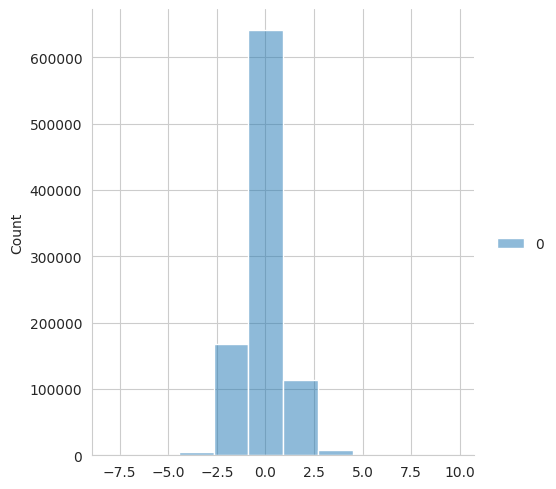

In [33]:
# TODO renta 数值型填充
# TODO
df.renta.fillna(df.renta.mean(), inplace=True)
df.renta = round(df.renta)
df.renta = df.renta.astype('int32')
# sns.scatterplot(df.renta, df.renta.value_counts())
# df.renta.plot.scatter(x='renta', y=df.renta.value_counts())
sns.set_style("whitegrid")

data = np.log(df.renta)
data = sd_scale(data)
df['log_renta'] = data
sns.displot(data,
            bins=10,
            kde=False,
            color="tomato")
plt.ylabel("Count")

In [34]:
round(data.min(), 2)
round(data.mean(), 2)
round(data.max(), 2)
data.shape

-8.03

-0.0

9.85

(936565, 1)

In [35]:
df.fecha_alta.value_counts(dropna=False)

2014-07-28    3467
2014-10-03    3421
2014-08-04    2816
2013-10-14    2651
2013-08-03    2024
              ... 
2014-09-20       1
1995-03-06       1
2011-08-28       1
2014-06-21       1
2014-01-18       1
Name: fecha_alta, Length: 6756, dtype: int64

In [36]:
pd.DatetimeIndex(df["fecha_alta"]).month.value_counts()

10    154944
9     110771
11    107397
7      97635
8      91770
12     70474
1      59015
2      53373
3      52420
4      49286
5      45792
6      43688
Name: fecha_alta, dtype: int64

In [37]:
temp = df.fecha_alta.astype('datetime64[M]')
temp.value_counts()

2015-10-01    27120
2013-10-01    24266
2015-09-01    22685
2014-10-01    22177
2012-10-01    19377
              ...  
1995-08-01      243
1995-04-01      136
1995-03-01      106
1995-01-01       78
1995-02-01       69
Name: fecha_alta, Length: 257, dtype: int64

In [38]:
df.antiguedad.value_counts(dropna=False)
od_set.add(df.antiguedad.name)

      0    21654
      1    18328
      2    16645
      3    16072
     12    15495
           ...  
    253       22
    254       10
    255        8
    256        7
-999999        3
Name: antiguedad, Length: 258, dtype: int64

In [39]:
df.fecha_alta.info()

<class 'pandas.core.series.Series'>
Int64Index: 936565 entries, 9249467 to 2839387
Series name: fecha_alta
Non-Null Count   Dtype 
--------------   ----- 
936565 non-null  object
dtypes: object(1)
memory usage: 14.3+ MB


In [40]:
x = pd.to_datetime(df.fecha_alta)
x.info()

<class 'pandas.core.series.Series'>
Int64Index: 936565 entries, 9249467 to 2839387
Series name: fecha_alta
Non-Null Count   Dtype         
--------------   -----         
936565 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.3 MB


In [41]:
# 6.fecha_alta 客户首次签订合同的日期, 可以用距今差值表示, 总结成月份, 然后判断和 antiguedad客户资历的关系
df.antiguedad.value_counts(dropna=False)
df.antiguedad.info()

# TODO 暂时先删除
df.drop('fecha_alta', inplace=True, axis=1)
# df.fecha_alta.isnull().sum()
# months_active = df.loc[df["ind_nuevo"].isnull(), :].groupby("ncodpers", sort=False).size()
# months_active.max()

      0    21654
      1    18328
      2    16645
      3    16072
     12    15495
           ...  
    253       22
    254       10
    255        8
    256        7
-999999        3
Name: antiguedad, Length: 258, dtype: int64

<class 'pandas.core.series.Series'>
Int64Index: 936565 entries, 9249467 to 2839387
Series name: antiguedad
Non-Null Count   Dtype 
--------------   ----- 
936565 non-null  object
dtypes: object(1)
memory usage: 14.3+ MB


In [42]:

# 7.ind_nuevo 新客户指数 2. 如果是6个月内注册的客户, 则为1
df.ind_nuevo = df.ind_nuevo.astype('int8')
df.ind_nuevo.value_counts(dropna=False)

od_set.add(df.ind_nuevo.name)

0    833326
1    103239
Name: ind_nuevo, dtype: int64

In [43]:
# 8. antiguedad 客户资历, 单位是月
df.antiguedad.value_counts(dropna=False)
od_set.add(df.antiguedad.name)

      0    21654
      1    18328
      2    16645
      3    16072
     12    15495
           ...  
    253       22
    254       10
    255        8
    256        7
-999999        3
Name: antiguedad, Length: 258, dtype: int64

In [44]:
# 6,7,8 缺失值数量相等已经删除

In [45]:
# 9.indrel  2:  1表示primary, 99表示当月primary,但不是月末?
# Nan =unknown
# one-hot label编码?
df.indrel = df.indrel.astype('int8')
df.indrel.value_counts(dropna=False)
od_set.add(df.indrel.name)

1     931634
99      4931
Name: indrel, dtype: int64

In [46]:
# 10. ult_fec_cli_1t 作为主要客户的日期
# 缺失值太多, 丢弃
# df.ult_fec_cli_1t.value_counts(dropna=False)
# df.ult_fec_cli_1t.isnull().sum()

In [47]:
# df.replace('unknown', -2, inplace=True)
# df.replace('P', -3, inplace=True)
# 必须先修改类型, 不然replace匹配不上
# df.indrel_1mes = df.indrel_1mes.astype('float')
df.indrel_1mes.replace({'1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4'}, inplace=True)  # 不同key用不同value替换
df.indrel_1mes.value_counts(dropna=False)
od_set.add(df.indrel_1mes.name)

1          916049
unknown     19213
3             844
2             248
P             158
4              53
Name: indrel_1mes, dtype: int64

In [48]:
# 12.tiprel_1mes 月初客户关系类型 A (active), I (inactive), P (former customer 前客户),R (Potential 潜在客户)
# Nan = unknown
# label 编码
df.tiprel_1mes.value_counts(dropna=False)
od_set.add(df.tiprel_1mes.name)

I          514645
A          401652
unknown     19213
P             897
R             158
Name: tiprel_1mes, dtype: int64

In [49]:
# 13. indresi 居住指数S (Yes) 银行和居住国相同 N (No) 不同国家
# label编码, S=1, N=0
df.indresi.value_counts(dropna=False)
od_set.add(df.indresi.name)


S    932574
N      3991
Name: indresi, dtype: int64

In [50]:
# 14. indext 外国人指数, S 本国出生, N 非本国
# label 编码
df.indext.value_counts(dropna=False)
od_set.add(df.indext.name)


N    890030
S     46535
Name: indext, dtype: int64

In [51]:
# 15. conyuemp 配偶指数, S 客户是员工配偶
# 缺失太多, 删除列
# df.conyuemp.value_counts(dropna=False)

In [52]:
# 16. canal_entrada	客户渠道 (拉新渠道)
# Nan = unknown, 占比小于3%都是other
# 用占比, 占比低的作为others
df.canal_entrada.value_counts(dropna=False)
# df.canal_entrada.isnull().sum()
# print(100 * round(df.canal_entrada.value_counts(dropna=False) / df.shape[0], 8))
od_set.add(df.canal_entrada.name)

KHE    254049
KAT    208199
KFC    202739
KHQ     66115
KFA     26077
        ...  
KDL         1
025         1
KGN         1
KDI         1
KDB         1
Name: canal_entrada, Length: 161, dtype: int64

In [53]:
# 17. indfall 已故索引 N/S
df.indfall.value_counts(dropna=False)
od_set.add(df.indfall.name)


N    934174
S      2391
Name: indfall, dtype: int64

In [54]:
# 18. tipodom 地址类型. 1, primary address 弃用
# Nan dropna
# 没有区分度, 删除列
# label编码
df.tipodom.value_counts(dropna=False)
df.drop('tipodom', axis=1, inplace=True)

1.0    936565
Name: tipodom, dtype: int64

In [55]:
# 19.cod_prov 省份编码
# 转成int
# Nan = 0?
# number
df.cod_prov = df.cod_prov.astype('int8')
df.cod_prov.value_counts(dropna=False)
od_set.add(df.cod_prov.name)


 28    300728
 8      89223
 46     48323
 41     40782
 15     28990
 30     27766
 29     24676
 50     23315
 3      22298
 11     19895
 36     19085
 33     18455
 35     16441
 47     16186
 6      13071
 45     12743
 48     12639
 18     12474
 37     11124
 39     10871
 14      9884
 7       9187
 10      8646
 13      8120
 21      8080
 2       7854
 43      7668
 12      7198
 9       6709
 17      6352
 31      6055
 26      5846
 24      5798
 27      5716
 32      5658
 25      5477
 38      5138
 20      4916
 19      4716
 23      4515
 4       4332
-1       3993
 16      3826
 49      3441
 34      3366
 40      2907
 22      2808
 5       2665
 1       2625
 44      1561
 42      1269
 52       641
 51       513
Name: cod_prov, dtype: int64

In [56]:
# 20. nomprov 省份名称 删除
# df.nomprov.value_counts(dropna=False)

In [57]:
# 21. ind_actividad_cliente	活跃指数 1, active customer; 0, inactive customer)
df.ind_actividad_cliente = df.ind_actividad_cliente.astype('int8')
df.ind_actividad_cliente.value_counts(dropna=False)
od_set.add(df.ind_actividad_cliente.name)


0    537620
1    398945
Name: ind_actividad_cliente, dtype: int64

In [58]:
# 23. segmento : 01 - VIP, 02 - 个人 03 - 大学毕业
# Nan = unknown
# ordinal 编码
df.segmento.value_counts()
od_set.add(df.segmento.name)


02 - PARTICULARES     538245
03 - UNIVERSITARIO    339238
01 - TOP               35032
00                     24050
Name: segmento, dtype: int64

In [59]:
# 未编码的列, 就是数值特征
continuous_set = set(df.columns) - od_set - oh_set - set(y_name_list)
# 数值集合
continuous_set
# 序号编码
od_set
# onehot编码
oh_set

{'age', 'log_renta', 'renta'}

{'antiguedad',
 'canal_entrada',
 'cod_prov',
 'ind_actividad_cliente',
 'ind_empleado',
 'ind_nuevo',
 'indext',
 'indfall',
 'indrel',
 'indrel_1mes',
 'indresi',
 'pais_residencia',
 'segmento',
 'sexo',
 'tiprel_1mes'}

set()

In [60]:
from sklearn.preprocessing import QuantileTransformer

# QuantileTransformer(df.age, n_quantiles=300, output_distribution='normal', random_state=0)


In [61]:
# 编码流程
len(od_set)


15

In [62]:
finished = []
for name in od_set:
    print(name)
    df = pd.concat([df, new_ordinal_df(df[name], label_enc(df[name]))], axis=1)
    finished.append(name)
df.drop(finished, inplace=True, axis=1)


indext
indfall
pais_residencia
ind_actividad_cliente
indrel
ind_empleado
canal_entrada
sexo
indresi
indrel_1mes
cod_prov
antiguedad
segmento
tiprel_1mes
ind_nuevo


In [63]:
# 删除原renta, 保留log_renta
df.drop('renta', axis=1, inplace=True)

In [64]:
X = df.drop(y_name_list, axis=1)
y = df.loc[:, y_name_list]
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(X, y, test_size=0.3)


# 模型选择

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

<Figure size 5000x3000 with 0 Axes>

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 5000x3000 with 0 Axes>

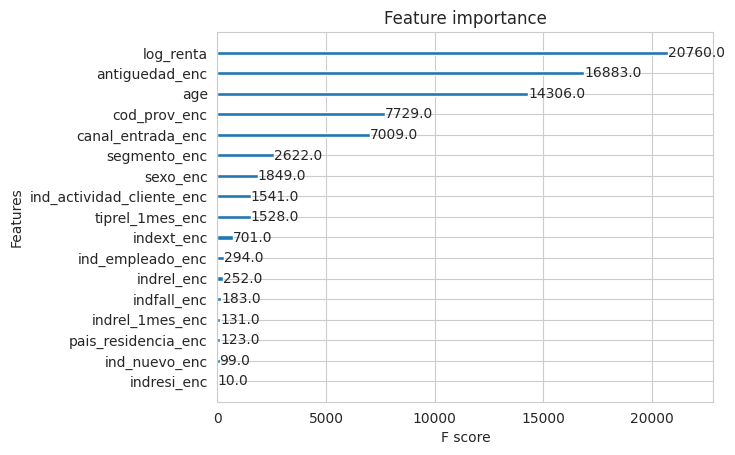

In [65]:
import xgboost

xb = xgboost.XGBClassifier()
xb.fit(Xtrain, Ytrain)

plt.figure(figsize=(50, 30))
selected_features = xb.feature_importances_
xgboost.plot_importance(xb)
plt.show()

In [66]:

importance = xb.get_booster().get_score()
importance_dict = sorted(importance.items(), key=lambda k: k[1], reverse=True)
importance_dict

[('log_renta', 20760.0),
 ('antiguedad_enc', 16883.0),
 ('age', 14306.0),
 ('cod_prov_enc', 7729.0),
 ('canal_entrada_enc', 7009.0),
 ('segmento_enc', 2622.0),
 ('sexo_enc', 1849.0),
 ('ind_actividad_cliente_enc', 1541.0),
 ('tiprel_1mes_enc', 1528.0),
 ('indext_enc', 701.0),
 ('ind_empleado_enc', 294.0),
 ('indrel_enc', 252.0),
 ('indfall_enc', 183.0),
 ('indrel_1mes_enc', 131.0),
 ('pais_residencia_enc', 123.0),
 ('ind_nuevo_enc', 99.0),
 ('indresi_enc', 10.0)]

In [67]:
for i in Xtrain.columns.to_list():
    if i not in [im[0] for im in importance_dict]:
        print(i)

# 模型搭建

In [68]:

from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve

import sklearn.metrics as metrics


def print_evaluation(y_true, y_pred, target_names=None, average='micro'):
    acc = metrics.accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    # precision = metrics.precision_score(y_true, y_pred, average=average)
    # metrics.recall_score(y_true, y_pred, average=average)
    # metrics.f1_score(y_true, y_pred, average=average)

    # 统一precision+recall+f1
    prf = metrics.precision_recall_fscore_support(y_true, y_pred, average=average)
    hamming = metrics.hamming_loss(y_true, y_pred)
    # kappa不支持多标签
    # kappa = metrics.cohen_kappa_score(y_true, y_pred)

    print(f"acc \n{acc}")
    print(f"report \n{report}")
    print(f'precision_recall_fscore_support\n{prf}\n')
    # print(f'multilabel_confusion_matrix\n{confusion_mat}')
    # print(f'auc\n{auc}')
    print(f'hamming\n{hamming}\n')
    # print(f'kappa\n{kappa}\n')


# 混淆矩阵
def show_matrix(y_true, y_pred):
    fig = plt.figure(figsize=(16, 20))

    mat = metrics.multilabel_confusion_matrix(y_true, y_pred)
    for i in range(24):
        ax = fig.add_subplot(6, 4, i + 1)
        sns.heatmap(mat[i], annot=True, fmt='.20g', ax=ax)
        ax.set_title(f'{Yvalidation.iloc[:, i].name}')
        plt.subplots_adjust(wspace=0.3, hspace=0.3)
        # point = int(f'9{left}{right}')
        # print(point)
        # f.add_subplot(point)
        # break
    # plt.tight_layout()
    plt.show();


# roc曲线绘制
def show_roc(y_true, y_proba, plot=True):
    plt.figure(figsize=(5, 5), dpi=100)
    aucs = []
    for c in range(y_true.shape[1]):
        if y_proba[c].shape[0] == 24:
            fpr, tpr, thresholds = metrics.roc_curve(np.array(y_true.iloc[:, c]).ravel(), y_proba[:, c].ravel())
        else:
            fpr, tpr, thresholds = metrics.roc_curve(np.array(y_true.iloc[:, c]).ravel(),
                                                     y_proba[c][:, 1].ravel())
        auc = metrics.auc(fpr, tpr)
        if plot:
            plt.plot(fpr, tpr, label='AUC = %0.2f')  #生成ROC曲线
        # g = sns.FacetGrid(tips, col='time', row='smoker')  # 按行和列的分类做N个图
        # g.map(plt.hist, 'total_bill', bins=10)  # 指定做图方式
        # break
        print(f'auc : {auc}')
        aucs.append(auc)
    avg_auc = f'average auc {np.mean(aucs)}'
    # print(avg_auc)
    if plot:
        plt.show();
    return np.mean(aucs)

# print_evaluation(Yvalidation, y_pred, average='micro')


In [128]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# GBDT
cpu_threads = 18
gbdt = GradientBoostingClassifier(
    n_estimators=100,  # 树的数量
    max_depth=8,  # 树的最大深度
    ccp_alpha=0.0,
    criterion='gini',  # gini, entropy, log_loss
    init=None,
    learning_rate=0.1,
    loss='deviance',
    max_features=10,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_iter_no_change=None,
    random_state=None,
    subsample=1.0,
    tol=0.0001,
    validation_fraction=0.1,
    verbose=0,
    warm_start=False
)
# RF
rfc = RandomForestClassifier(
    n_estimators=80,  # 树的个数
    criterion='gini',  #
    max_depth=10,  # 最大深度
    min_samples_split=50,  # 样本最小分裂
    min_samples_leaf=10,  # 叶子最小样本数
    max_features='sqrt',
    max_leaf_nodes=None,
    n_jobs=-1,
    # 以下是不重要参数
    min_impurity_decrease=0.0,
    min_weight_fraction_leaf=0.0,
    bootstrap=True,
    oob_score=False,
    random_state=0,
    verbose=1,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

knn = KNeighborsClassifier(
    n_neighbors=Ytrain.shape[1],  # k的个数
    weights="distance",  # distance, uniform, callable 权重判断方式
    n_jobs=cpu_threads,
    algorithm='auto',
    p=2,  # 明可夫距离, 2就是欧式距离, >=3 其他明氏距离
)

svc = OneVsRestClassifier(
    LinearSVC(
        C='',
        # kernel='RBF'
    ),
    n_jobs=cpu_threads
)

lr = OneVsRestClassifier(LogisticRegression(
    penalty='l2',  # 正则项, l1, l2
    solver='sag',  # 最优化求解方法 liblinear, newton-cg, lbfgs, sag
    class_weight='auto',  # 类别权重
    # sample_weight = 'auto', # 样本权重, 最终权重是类别权重*样本权重
    n_jobs=cpu_threads,
    multi_class='ovr',  # multinomial, ovr, 多类别ovr和mvm
    # 以下不常用
    dual=False,  # 对偶或者原始方法。Dual只适用于正则化相为l2的‘liblinear’的情况，通常样本数大于特征数的情况下，默认为False。
    fit_intercept=True,  # 是否存在截距，默认存在。
    intercept_scaling=1,  # 仅在正则化项为‘liblinear’，且fit_intercept设置为True时有用。
    max_iter=20,  # 算法收敛的最大迭代次数。
    tol=0.0001,  # 迭代终止判据的误差范围。
    verbose=0,  # 日志冗长度int：冗长度；0：不输出训练过程；1：偶尔输出； >1：对每个子模型都输出
    warm_start=False,  # 是否热启动，如果是，则下一次训练是以追加树的形式进行（重新使用上一次的调用作为初始化）。布尔型，默认False。
))

# XGBoost
xgb = OneVsRestClassifier(XGBClassifier(
    booster='gbtree',  # gbtree, gblinear, dart选择模型, 常用树模型, 性能好
    num_class=Ytrain.shape[1],
    n_estimators=200,  # 生成的最大树的数目，也是最大的迭代次数
    max_depth=5,  # 最大深度 3-10常用
    max_leaves=100,
    learning_rate=0.1,  #学习率, 0.01-0.3
    objective='multi:softmax',  # 目标

    verbosity=1,
    tree_method='auto',
    # 正则化
    reg_alpha=0.1,  # l1正则参数
    reg_lambda=0.4,  # l2正则参数
    min_child_weight=5,
    max_delta_step=0,
    subsample=0.8,
    # n_jobs=cpu_threads,
    colsample_bytree=0.7,
    # scale_pos_weight=0.8,
    # eval_metric='auc',
    seed=0,
    gamma=0,
    random_state=0,
    # 在节点分裂时，只有分裂后损失函数的值下降了，才会分裂这个节点。gamma指定了节点分裂所需的最小损失函数下降值。 这个参数的值越大，算法越保守。因为gamma值越大的时候，损失函数下降更多才可以分裂节点。所以树生成的时候更不容易分裂节点。范围: [0,∞]
),n_jobs=-1
)

# LightGBM
lgb = OneVsRestClassifier(LGBMClassifier(
    # 先固定的参数
    boosting_type='gbdt',  # gbdt, rf, dart, goss
    objective='multiclass',
    # regression，使用L2正则项的回归模型
    # regression_l1，使用L1正则项的回归模型。
    # mape，平均绝对百分比误差。
    # binary，二分类。
    # multiclass，多分类
    num_class=24,  # 多分类类别数
    n_estimators=100,  # 子树数量
    learning_rate=0.1,  # 学习率
    metric='multi_logloss',
    num_leaves=150, # 单颗树的叶子数, 对模型影响很大
    min_child_samples=50,  # 叶节点样本的最少数量, 防止过拟合
    min_child_weight=1,  # 指定孩子节点中最小的样本权重和，如果一个叶子节点的样本权重和小于min_child_weight则拆分过程结束，默认值为1。
    min_split_gain=0, # 增大会使树变矮, 指定叶节点进行分支所需的损失减少的最小值，默认值为0。设置的值越大，模型就越保守。
    # 需要调节的参数
    max_depth=8,
    # num_leaves=200,  # 叶子数量, 应该小于 2^max_depth
    # 评估指标
    subsample=1,  # 行采样, 小于1就有一部分不会被采样, 防止过拟合, 需要bagging_freq=0生效
    bagging_freq=0,  # 生效subsample
    # 正则化
    reg_alpha=0,  # l1正则
    reg_lambda=0.3,  # l2正则系数
    # 以下不常用
    # subsample_for_bin=200000,
    # feature_fraction=1,  # 对特征随机采样的比例, 列采样
    random_state=0,
    # class_weight='is_unbalance', # 类别权重
    # subsample_freq=
    verbose_eval=100,
    missing=1,


), n_jobs=-1
)

models = {'rfc': rfc, 'gbdt': gbdt}
models
pred_dict = {}
# for name, model in models.items():
#     model.fit(Xtrain, Ytrain)
#     # y_pred = model.predict(Xvalidation)
#     # gbm.fit(Xtrain, Ytrain, eval_set=[(Xvalidation, Yvalidation)], eval_metric='l1', early_stopping_rounds=5)
#
# for name, m in models.items():
#     m.fit(Xtrain, Ytrain)
#     y_pred = m.predict(Xvalidation)
#     y_pred_proba = m.predict_proba(Xvalidation)
#     pred_dict[name] = (y_pred, y_pred_proba)

{'rfc': RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=50,
                        n_estimators=80, n_jobs=-1, random_state=0, verbose=1),
 'gbdt': GradientBoostingClassifier(criterion='gini', loss='deviance', max_depth=8,
                            max_features=10)}

In [ ]:
from sklearn.model_selection import KFold, LeaveOneOut, LeavePOut

cv = False
# cv = True
kf = KFold(n_splits=6)
m = lgb
if cv:
    train_auc_list = []
    validation_auc_list = []
    print(Xtrain.shape)
    for train, test in kf.split(X):
        print("k折划分：%s %s" % (train.shape, test.shape))
        train
        # m = lgb
        # m.fit(train, test)
        # y_pred_proba = m.predict_proba(Xvalidation)
        # train_pred_proba = m.predict_proba(Xtrain)
        # train_auc_list.append(show_roc(Ytrain, train_pred_proba, False))
        # validation_auc_list.append(show_roc(Yvalidation, y_pred_proba, False))
        break
    print(f'训练平均auc {np.mean(train_auc_list)}')
    print(f'验证平均auc {np.mean(validation_auc_list)}')
else:
    m.fit(Xtrain, Ytrain)

In [ ]:
if not cv:
    y_pred = m.predict(Xvalidation)
    y_pred_proba = m.predict_proba(Xvalidation)
    train_pred = m.predict(Xtrain)
    train_pred_proba = m.predict_proba(Xtrain)

In [ ]:
# bst = xgb.Booster()
# bst.load_model('xgb.model')
# plot
# xgboost.to_graphviz(xgb)
# plot_tree(bst,fmap='', num_trees=0, rankdir='UT', ax=None)
# plt.show()

In [ ]:
# 验证集
print_evaluation(y_true=Yvalidation, y_pred=y_pred)


In [ ]:
# 训练集
print_evaluation(Ytrain, train_pred)

auc : 0.8927051071835059
auc : 0.9599565510638448
auc : 0.8056605918036854
auc : 0.9145843375601413
auc : 0.8942156198469058
auc : 0.9997382671597712
auc : 0.9575720758668438
auc : 0.9263947149867358
auc : 0.9157213534644589
auc : 0.9508966907315757
auc : 0.9280774911863117
auc : 0.9388796189563114
auc : 0.8991783241133398
auc : 0.9364950681642504
auc : 0.9568878937342719
auc : 0.9401405376597504
auc : 0.959106652151598
auc : 0.8841725299955178
auc : 0.9165003295558258
auc : 0.9298775094888648
auc : 0.9029989373557784
auc : 0.9024772810819663
auc : 0.8957076245717024
auc : 0.9063553427418294
average auc0.9214291854343662


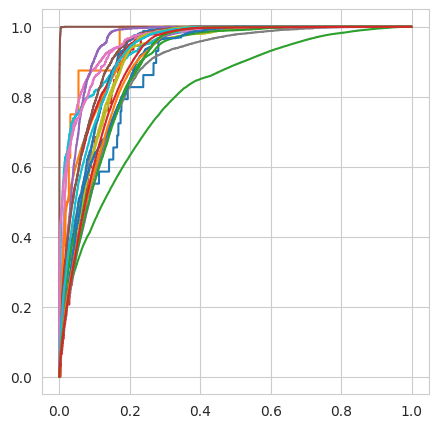

'average auc0.9214291854343662'

auc : 0.9660771564023991
auc : 0.9914041733440375
auc : 0.8075043450677919
auc : 0.942196814668325
auc : 0.898072685950601
auc : 0.9997569307984151
auc : 0.9583120513558454
auc : 0.9276015056860577
auc : 0.9198167211467894
auc : 0.9608751048317269
auc : 0.9369332837831466
auc : 0.9399126271988496
auc : 0.9003641573522041
auc : 0.9369651323919457
auc : 0.9553154863524882
auc : 0.9389170170914553
auc : 0.965629461713049
auc : 0.8877382828863688
auc : 0.9178986945016233
auc : 0.932092210138914
auc : 0.9103742463571065
auc : 0.9059801010675134
auc : 0.8994284935407203
auc : 0.9075170204765325
average auc0.9294451543376628


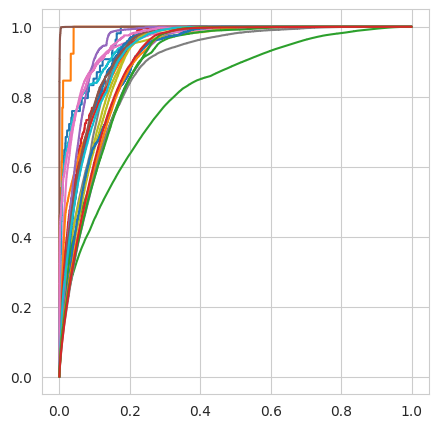

'average auc0.9294451543376628'

In [126]:
# show_matrix()
# show_matrix(Yvalidation, y_pred)
show_roc(Yvalidation, y_pred_proba)
show_roc(Ytrain, train_pred_proba)

In [ ]:
 # GridSearch 寻找超参

param_test = {
    'max_depth': (5, 10),
    # 'num_leaves': range(10, 40, 5),
}

clf = GridSearchCV(m, param_grid=param_test, cv=3, scoring='roc_auc', n_jobs=-1)
clf.fit(Xtrain, Ytrain)
best_model = clf.best_estimator_

# 最优超参
print(clf.best_params_)


In [87]:
sample_raw = pd.read_csv('../input/sample_submission.csv')
df_proba = pd.DataFrame(y_pred_proba)
df_proba.columns = Ytrain.columns

sample_raw['added_products'] = df_proba.idxmax(axis=1)
sample_raw.index = sample_raw.index + 1

sample_raw.to_csv('xgb.csv', index=False)

In [ ]:
Xtrain.shape

In [92]:
import joblib
# Save to file in the current working directory
joblib_file = "joblib_model.pkl"
joblib.dump(m, joblib_file)

['joblib_model.pkl']

In [94]:
load_model = joblib.load("joblib_model.pkl")